In [1]:
from models import models_builder
from utils import dataframeUtil
import Configurations as config
from utils import modelUtils
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import joblib

Configuration report:
Number of Subgroups is: 7
The Trend Simulation Formel is: x*1.3+10


In [2]:
#models_builder.createModels_for_prediction()

In [3]:
# Import Dataset
DataPoinstsNumber = 4
x_test,y_test = dataframeUtil.getDataset(config.testDatasetName,config.neuralInputsNumber,config.numberOftargetVariables)
x_test = x_test[:,0:DataPoinstsNumber]
neuralInputsNumber = DataPoinstsNumber
targetVarNumber = config.numberOftargetVariables

In [4]:
# load models
suffix ="prediction"
dnn_model=keras.models.load_model(config.model_output_path+suffix+'/dnn_model_'+suffix)
rf_model = joblib.load(config.model_output_path+suffix+'/random_forest_'+suffix+'.joblib')
svm_model = joblib.load(open(config.model_output_path+suffix+'/svm_model_'+suffix+'.sav', 'rb'))

In [5]:
TotalErrorDic={}
summarized_tabel_dic ={}
grouped_table_dic ={}
def get_wkt(summarized_tabel,modelName):
    total = summarized_tabel['size'].sum()
    total_error = total / 5000
    print("Total Erro for the Model"+modelName +": ",total_error)
    TotalErrorDic[modelName]=total_error
    wkt = summarized_tabel["%"].values
    wkt = wkt / 100
    wkt = wkt * total_error
    wkt = 1 - wkt
    return wkt

def getPredResult(model,modelName,x_test,y_test):
    wrongClassificationsCharts,shouldClassifications= modelUtils.getFalseClassifications(model,x_test,y_test)
    table,table_with_count_of_duplicated,grouped_table,summarized_tabel = modelUtils.getFalseClassificationsReport(model,wrongClassificationsCharts,shouldClassifications)
    grouped_table.to_excel("scores/pred_"+modelName+"_grouped_scores.xls")
    summarized_tabel.to_excel("scores/pred_"+modelName+"_summarized_scores.xls")
    summarized_tabel_dic[modelName]= summarized_tabel
    grouped_table_dic[modelName]= grouped_table
    wkt = get_wkt(summarized_tabel,modelName)
    return wkt

def getPredResult_svm(model,modelName,x_test,y_test):
    wrongClassificationsCharts,shouldClassifications= modelUtils.getFalseClassifications_svm(model,x_test,y_test)
    table,table_with_count_of_duplicated,grouped_table,summarized_tabel = modelUtils.getFalseClassificationsReport_svm(model,wrongClassificationsCharts,shouldClassifications)
    grouped_table.to_excel("scores/pred_"+modelName+"_grouped_scores.xls")
    summarized_tabel.to_excel("scores/pred_"+modelName+"_summarized_scores.xls")
    summarized_tabel
    wkt = get_wkt(summarized_tabel,modelName)
    return wkt


In [6]:
dnn_model_score =getPredResult(dnn_model,"dnn_model",x_test,y_test)
rf_model_score =getPredResult(rf_model,"rf_model",x_test,y_test)
svm_model_score =getPredResult_svm(svm_model,"svm_model",x_test,y_test)

False Predictions Number:  1078  from:  5000
1078 1078


C:\Users\Kal\AppData\Local\Temp\ipykernel_69712\81717545.py:18: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  grouped_table.to_excel("scores/pred_"+modelName+"_grouped_scores.xls")
C:\Users\Kal\AppData\Local\Temp\ipykernel_69712\81717545.py:19: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecat

Total Erro for the Modeldnn_model:  0.2156
False Predictions Number:  1131  from:  5000
1131 1131
Total Erro for the Modelrf_model:  0.2262


C:\Users\Kal\AppData\Local\Temp\ipykernel_69712\81717545.py:18: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  grouped_table.to_excel("scores/pred_"+modelName+"_grouped_scores.xls")
C:\Users\Kal\AppData\Local\Temp\ipykernel_69712\81717545.py:19: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecat

False Predictions Number:  1108  from:  5000
1108 1108
Total Erro for the Modelsvm_model:  0.2216


C:\Users\Kal\AppData\Local\Temp\ipykernel_69712\81717545.py:28: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  grouped_table.to_excel("scores/pred_"+modelName+"_grouped_scores.xls")
C:\Users\Kal\AppData\Local\Temp\ipykernel_69712\81717545.py:29: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecat

In [7]:
print(dnn_model_score)

[0.9696004  0.93659204 0.94860096 0.97020408 0.95940252]


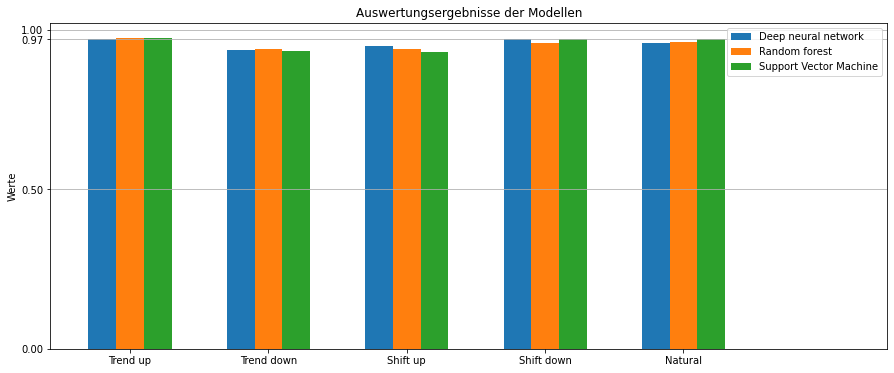

In [10]:
index = np.arange(5)
bar_width = 0.2
push=0.1
ml_labels=["Deep neural network","Random forest","Support Vector Machine"]
fig, ax = plt.subplots(figsize=(15, 6),sharex=True)
ax.bar(index-bar_width+push, dnn_model_score, bar_width,label="Deep neural network")
ax.bar(index+push, rf_model_score,bar_width, label="Random forest")
ax.bar(index+1*bar_width+push, svm_model_score,bar_width, label="Support Vector Machine")

ax.bar(index+6*bar_width, 0,bar_width)
ax.set_ylabel('Werte')
ax.set_title('Auswertungsergebnisse der Modellen')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(config.labels)
ax.legend()
plt.grid(axis = 'y')
xmarks=[0.0,0.5,0.97,1.0]
plt.yticks(xmarks)
plt.savefig('plots/{}'.format("pred_models_muster_scores"), dpi=300)
plt.show()